# Final Capstone

## Application of Clustering, Neural Network and Classification Models with Supervised Learning using Balanced Data

The data set is the audit tool data set (seperate file) which has already gone through an EDA process and includes several new features to enhance the data set.  

This notebook will apply the follwing models:

1. MLP Classifier
2. K-Means
3. K-Shift
4. Decision Tree
5. Random Forest
6. KNN


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import collections, numpy
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from collections import Counter
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import datetime
%matplotlib inline

In [3]:
#Import the dataset

audit=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/audit_clean_dataset.csv')

audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116557 entries, 0 to 116556
Data columns (total 45 columns):
Unnamed: 0                          116557 non-null int64
id                                  116557 non-null object
device_id                           116557 non-null object
material_type                       116557 non-null object
package_id                          116557 non-null int64
net_weight                          116557 non-null float64
unit                                116557 non-null object
package_date                        116557 non-null object
create_date                         116557 non-null object
employee_code                       116557 non-null object
img_url                             116557 non-null object
ext_printed                         116557 non-null float64
barcode                             116557 non-null object
gross_weight                        116557 non-null float64
audit_status                        116557 non-null object
aud

In [4]:
audit.describe()

,Unnamed: 0,package_id,net_weight,ext_printed,gross_weight,audit_reject_reasonid,orig_tare_weight,orig_net_weight,time_delta,standard_weight,...,standard_w_avg,standard_w_std,mad_weight,mad_var,weight_var_index,changed_weight,label,audited,image,duplicate_counts
count,116557.000000,116557.000000,116557.000000,116557.000000,116557.000000,116557.000000,116557.0,116557.000000,116557.000000,116557.000000,...,116557.000000,116557.000000,1.165570e+05,1.165570e+05,116557.000000,116557.000000,116557.000000,116557.000000,116557.000000,116557.000000
mean,89948.764450,4694.310286,564.541726,0.031075,87.279563,0.217439,0.0,2.216718,425.967176,386.621437,...,386.243304,52.271395,3.819589e+01,inf,0.348954,0.005971,0.226627,1.062013,0.946515,1.417624
std,39029.923395,8399.444005,305.724817,0.310614,170.991260,1.066837,0.0,32.372118,518.991645,117.378241,...,94.888425,45.853402,5.810211e+01,NaN,0.476641,0.077044,0.418651,0.270616,0.224999,0.698330
min,2140.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.116667,39.000000,...,55.787360,0.000000,2.864908e-11,6.122117e-06,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,58095.000000,233.000000,390.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.116667,364.000000,...,360.165333,20.000000,3.082251e+00,2.775220e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,87599.000000,653.000000,442.000000,0.000000,0.000000,0.000000,0.0,0.000000,166.200000,421.000000,...,415.275806,45.000000,1.611860e+01,6.226297e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,123937.000000,3097.000000,979.000000,0.000000,0.000000,0.000000,0.0,0.000000,785.666667,453.592000,...,453.592000,66.000000,4.463668e+01,1.526000e+00,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,153095.000000,32545.000000,1082.000000,40.000000,488.000000,7.000000,0.0,1211.000000,1628.800000,531.156232,...,507.486986,219.000000,4.398928e+02,inf,1.000000,1.000000,1.000000,3.000000,1.000000,13.000000


# Application of Clustering Models

### Define X & Y, split the data for training and testing and then balance the dataset

In [5]:
#Define the X and Y variables
X = audit[['standard_weight', 'weight_var_index', 
           'Material', 'image', 'label', 
           'time_delta','duplicate_counts']]

y = audit['audit_status']

In [6]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [7]:
#Balanced the data for the clsutering models
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

#define the parameters for
smote_enn = SMOTEENN(random_state=0)
smote_tomek = SMOTETomek(random_state=0)

#fit the sampling models
#X_resampled, y_resampled = smote_enn.fit_resample(X_Train, y_train)
#print('SMOTEENN dataset:',sorted(Counter(y_resampled).items()))

X_resampled, y_resampled = smote_tomek.fit_resample(X_Train, y_train)
print('SMOTETomek dataset:',sorted(Counter(y_resampled).items()))

SMOTETomek dataset: [('A', 75132), ('C', 76207), ('R', 75883)]


### MLP Classificaiton Model with Balanced Data

In [8]:
#Start timer
mlp_res_start = time.time()

#Run the MLP Classifier on the balanced data using train/test/split
MLP_res_X_train, MLP_res_X_test, mlp_res_y_train, mlp_res_y_test = train_test_split(
                                                                    X_resampled, y_resampled, test_size=.3)

mlp_res_test = MLPClassifier(hidden_layer_sizes=(100,4))
mlp_res_test.fit(MLP_res_X_train, mlp_res_y_train)

#Now use the model to predict
mlp_res_pred = mlp_res_test.predict(MLP_res_X_test)


print('MLP Model Score_Balanced Data:', round(mlp_res_test.score(X_resampled, y_resampled),4))
print('Classification Report MLP :\n', classification_report(mlp_res_y_test, mlp_res_pred))

print("Processing time: %s seconds" % round((time.time() - mlp_res_start), 4))

MLP Model Score_Balanced Data: 0.3354


/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report MLP :
               precision    recall  f1-score   support

           A       0.00      0.00      0.00     22586
           C       0.33      1.00      0.50     22677
           R       0.00      0.00      0.00     22904

    accuracy                           0.33     68167
   macro avg       0.11      0.33      0.17     68167
weighted avg       0.11      0.33      0.17     68167

Processing time: 13.8003 seconds


In [9]:
#export classification report to HTML
mlp_report = classification_report(mlp_res_y_test, mlp_res_pred, output_dict=True)
mlp_report_df = pd.DataFrame(mlp_report).transpose()
mlp_summary = mlp_report_df.to_excel('/Users/sjadallah/Dropbox/Thinkful_data/Capstone Final/mlp_report.xlsx')

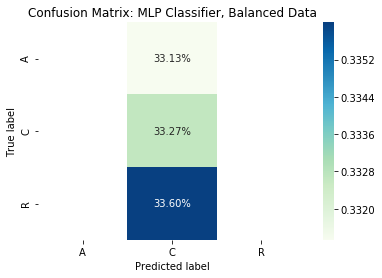

In [10]:
# Plot a heatmap/confusion matrix to visualize model performance
labels = unique_labels(audit['audit_status'])
cm = confusion_matrix(mlp_res_y_test, mlp_res_pred, labels)

#Transform confusion matrix into dataframe for visualizing
cm_df = pd.DataFrame(cm,
                     index = ['A', 'C', 'R'], 
                     columns = ['A','C','R'])
ax = sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%', cmap='GnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: MLP Classifier, Balanced Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('Confusion Matrix: MLP Classifier, Balanced Data.png')
plt.show()

### K-Means Clustering with Labeled Output and Balanced Data

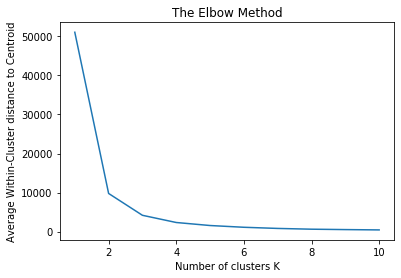

In [11]:
#Define dataset for clustering
KMB_X = X_resampled

y = y_resampled

# Normalize the data because of the variance in the features
KMB_X_norm = normalize(KMB_X)

# Using the elbow method to find  the optimal number of clusters
ks = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(KMB_X_norm)
  ks.append(kmeans.inertia_)
plt.plot(range(1, 11),ks)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid') 
plt.savefig('Elbow Method for Cluster Selection.png')  
plt.show()

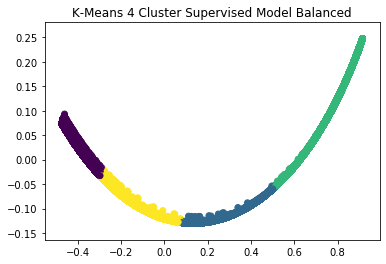

Comparing 4 Cluster K-Means Balanced Against The Data:

col_0       A       C       R
row_0                        
0      0.2891  0.1211  0.5898
1      0.3786  0.4322  0.1892
2      0.3876  0.4612  0.1512
3      0.3165  0.5154  0.1681
Processing time: 19.0681 seconds


In [12]:
#Set time
kmb4_start = time.time()

# Reduce it to two components.
KMB4_X_pca = PCA(2).fit_transform(KMB_X_norm)

# Calculate predicted values.
kmb4_y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(KMB_X_norm)


#Plot the solution.
plt.scatter(KMB4_X_pca[:, 0], KMB4_X_pca[:, 1], c=kmb4_y_pred)
plt.title('K-Means 4 Cluster Supervised Model Balanced')
plt.savefig('k_means_labeled_4cluster_balanced.png')
plt.show()

# Check the solution against the data.
print('Comparing 4 Cluster K-Means Balanced Against The Data:\n')
print(round(pd.crosstab(kmb4_y_pred, y, normalize = 'index'),4))

print("Processing time: %s seconds" % round((time.time() - kmb4_start), 4))

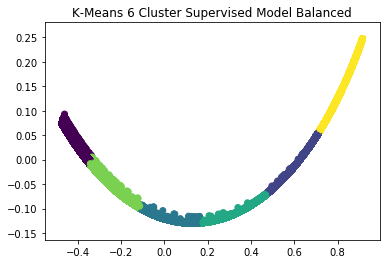

Comparing 4 Cluster K-Means Balanced Against The Data:

col_0       A       C       R
row_0                        
0      0.2932  0.0884  0.6184
1      0.4336  0.4521  0.1143
2      0.3740  0.4427  0.1833
3      0.3661  0.4550  0.1789
4      0.2807  0.5301  0.1892
5      0.3254  0.4682  0.2064
Processing time: 25.5785 seconds


In [13]:
#Set time
kmb6_start = time.time()

# Reduce it to two components.
KMB6_X_pca = PCA(2).fit_transform(KMB_X_norm)

# Calculate predicted values.
kmb6_y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(KMB_X_norm)


#Plot the solution.
plt.scatter(KMB6_X_pca[:, 0], KMB6_X_pca[:, 1], c=kmb6_y_pred)
plt.title('K-Means 6 Cluster Supervised Model Balanced')
plt.savefig('k_means_labeled_6cluster_balanced.png')
plt.show()

# Check the solution against the data.
print('Comparing 4 Cluster K-Means Balanced Against The Data:\n')
print(round(pd.crosstab(kmb6_y_pred, y, normalize = 'index'),4))

print("Processing time: %s seconds" % round((time.time() - kmb6_start), 4))

### Mean Shift Clustering Model with Labeled Output and Balanced Data

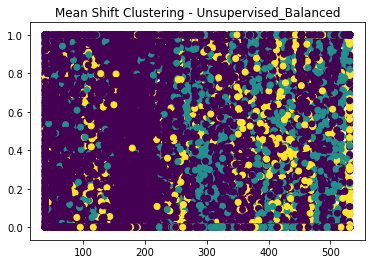

Number of estimated clusters: 3
Comparing the assigned categories to the ones in the data:
col_0       0       1       2
row_0                        
A      0.6892  0.2019  0.1090
C      0.6656  0.2224  0.1119
R      0.9027  0.0608  0.0364
Processing time: 19.5613 seconds


In [14]:
#Measure time performance
mshiftb_start = time.time()

#Pull the balanced data training and test sets.
MLP_res_X_train, MLP_res_X_test, mlp_res_y_train, mlp_res_y_test = train_test_split(
                                                                    X_resampled, y_resampled, test_size=.3)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(MLP_res_X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
msb = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msb.fit(MLP_res_X_train)

# Extract cluster assignments for each data point.
labels = msb.labels_

# Coordinates of the cluster centers.
cluster_centers = msb.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

#Plot the solution.
plt.scatter(MLP_res_X_train[:,0], MLP_res_X_train[:,1], c=labels)
plt.title('Mean Shift Clustering - Unsupervised_Balanced')
plt.savefig('mean-shift_labeled_balanced.png')
plt.show()


print("Number of estimated clusters: {}".format(n_clusters_))

#Check the solution against the data.
print('Comparing the assigned categories to the ones in the data:')
print(round(pd.crosstab(mlp_res_y_train,labels, normalize = 'index'),4))

print("Processing time: %s seconds" % round((time.time() - mshiftb_start), 4))


# Application of Classification Models

### Define X & Y, split the data for training and testing and then balance the dataset.  Use only binary or categorical variables

In [15]:
#Define the X and Y variables
X = audit[['standard_weight', 'weight_var_index',
           'Material', 'image', 'label', 'time_delta','duplicate_counts']]

y = audit['audited'] #binary y output

In [16]:
#Train, test split the dataset prior to balancing
#Will only balance the training
X1_Train, X1_Test, y1_train, y1_test = train_test_split(X, y, test_size=.3, stratify=y)

In [17]:
#Balanced the data for the clsutering models
# from imblearn.combine import SMOTEENN
# from imblearn.combine import SMOTETomek
# from imblearn.pipeline import make_pipeline
# from imblearn.over_sampling import SMOTE

#define the parameters for
smote_enn = SMOTEENN(random_state=0)
smote_tomek = SMOTETomek(random_state=0)

X1_resampled, y1_resampled = smote_tomek.fit_resample(X1_Train, y1_train)
print('SMOTETomek dataset:',sorted(Counter(y1_resampled).items()))

SMOTETomek dataset: [(1, 75089), (2, 75874), (3, 76129)]


### Decision Tree Model with Balanced Data

In [18]:
#Import the model and graphical functions
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

#Set the timer
dt_start = time.time()

#Train, test split the sampled data for the model
DT_X_Train, DT_X_Test, dt_y_train, dt_y_test = train_test_split(X1_resampled, 
                                                                y1_resampled, 
                                                                test_size=.3) 
            

#Call and fit the model
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy', 
    max_features=1,
    max_depth=7,
    random_state = 0
)

decision_tree.fit(DT_X_Train, dt_y_train)

# Render the tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Accepted', 'Rejected', 'Changed'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png("dtree.png")

True

In [19]:
#Now use the decision tree model to predict
dt_y_pred=decision_tree.predict(DT_X_Test)

print('DT Accuracy Score:', round(accuracy_score(dt_y_test, dt_y_pred),4))
print('DT Classification Report:\n', classification_report(dt_y_test, dt_y_pred))

DT Accuracy Score: 0.761
DT Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.73      0.76     22385
           2       0.87      0.76      0.81     22816
           3       0.65      0.79      0.72     22927

    accuracy                           0.76     68128
   macro avg       0.78      0.76      0.76     68128
weighted avg       0.77      0.76      0.76     68128



In [20]:
print('DT Parameters currently in use:\n')
print(decision_tree.get_params())

DT Parameters currently in use:

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}


### Random Forest Model with Balanced Data

In [21]:
#import the packages
from sklearn import ensemble

#Set the timer
rf_start = time.time()

#Define and fit the model
rfc = ensemble.RandomForestClassifier()
rfc.fit(DT_X_Train, dt_y_train)

#Use the model to predict
rfc_y_pred=rfc.predict(DT_X_Test)

print('RFC Accuracy Score:', round(accuracy_score(dt_y_test, rfc_y_pred),4))
print('RFC Classification Report:\n', classification_report(dt_y_test, rfc_y_pred))

print("Processing time: %s seconds" % round((time.time() - rf_start), 4))

/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC Accuracy Score: 0.9792
RFC Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97     22385
           2       0.98      0.98      0.98     22816
           3       0.98      0.99      0.98     22927

    accuracy                           0.98     68128
   macro avg       0.98      0.98      0.98     68128
weighted avg       0.98      0.98      0.98     68128

Processing time: 2.4513 seconds


In [22]:
#export classification report to HTML
rfc_report = classification_report(dt_y_test, rfc_y_pred, output_dict=True)
rfc_report_df = pd.DataFrame(rfc_report).transpose()
rfc_summary = rfc_report_df.to_excel('/Users/sjadallah/Dropbox/Thinkful_data/Capstone Final/rfc_report.xlsx')

In [23]:
print('RF Parameters currently in use:\n')
print(rfc.get_params())

RF Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


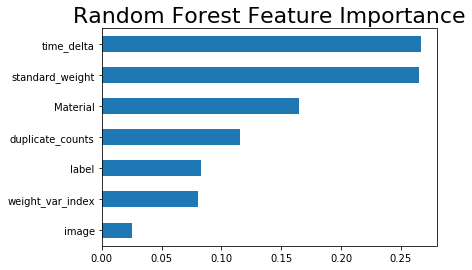

In [24]:
#Plot the important features of the model
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending = True).plot(kind='barh')
plt.title('Random Forest Feature Importance', fontsize = 22)
plt.savefig('Random Forest Feature Importance.png')

In [25]:
#Set the timer
rf2_start = time.time()

#Define and fit the model
rfc2 = ensemble.RandomForestClassifier(n_estimators = 20,
                                       n_jobs = -1,
                                       max_features = 'log2',
                                       max_depth = 15,
                                       oob_score = True,
                                       bootstrap = True,
                                       random_state = 42)

rfc2.fit(DT_X_Train, dt_y_train)

#Use the model to predict
rfc2_y_pred=rfc2.predict(DT_X_Test)

#print('RFC Training Accuracy Score:', round(accuracy_score(DT_X_Train, dt_y_train),4))
print('RFC Prediction Accuracy Score:', round(accuracy_score(dt_y_test, rfc2_y_pred),4))
print('RFC Out-of-Bag Score:{:2f}' .format(rfc2.oob_score_))
print('RFC Classification Report:\n', classification_report(dt_y_test, rfc2_y_pred))

print("Processing time: %s seconds" % round((time.time() - rf2_start), 4))

RFC Prediction Accuracy Score: 0.9532
RFC Out-of-Bag Score:0.949882
RFC Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.96      0.95     22385
           2       0.98      0.95      0.97     22816
           3       0.95      0.95      0.95     22927

    accuracy                           0.95     68128
   macro avg       0.95      0.95      0.95     68128
weighted avg       0.95      0.95      0.95     68128

Processing time: 2.7511 seconds


/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [26]:
#export classification report to HTML
rfc2_report = classification_report(dt_y_test, rfc2_y_pred, output_dict=True)
rfc2_report_df = pd.DataFrame(rfc2_report).transpose()
rfc2_summary = rfc2_report_df.to_excel('/Users/sjadallah/Dropbox/Thinkful_data/Capstone Final/rfc2_report.xlsx')

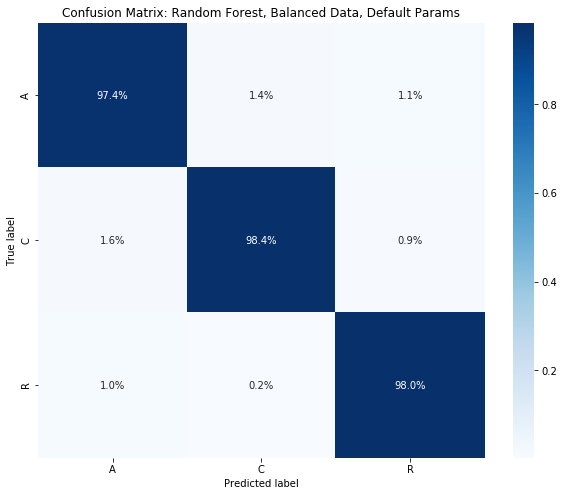

In [27]:
# # Plot the solutions using a heatmap/confusion matrix
# labels = unique_labels(audit['audited'])
# rfc_cm = confusion_matrix(dt_y_test, rfc_y_pred, labels)

# #Transform confusion matrix into dataframe for visualizing
# rfc_cm_df = pd.DataFrame(rfc_cm,
#                      index = ['A', 'C', 'R'], 
#                      columns = ['A','C','R'])
# fig, ax = plt.subplots(figsize=(10, 8))
# ax = sns.heatmap(rfc_cm_df/np.sum(rfc_cm_df), annot=True, fmt='.1%', cmap='Blues')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.title('Confusion Matrix: Random Forest, Balanced Data, Default Params')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.rcParams["font.family"] = "Arial"
# plt.rcParams["font.size"] = "14"
# plt.savefig('Confusion Matrix: Random Forest, Balanced Data Default Params.png')
# plt.show()

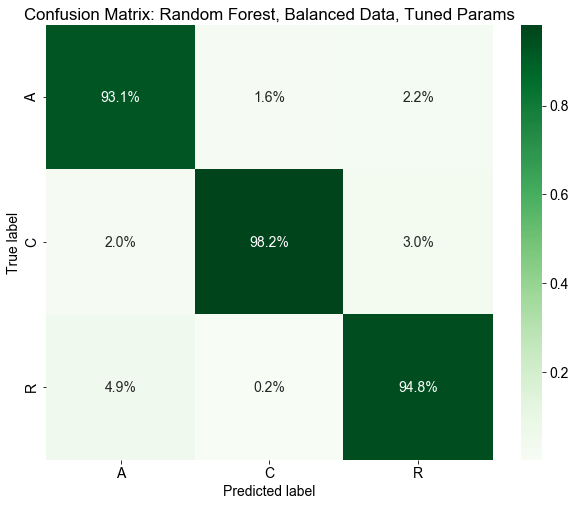

In [28]:
# # Plot the solutions using a heatmap/confusion matrix
# labels = unique_labels(audit['audited'])
# rfc2_cm = confusion_matrix(dt_y_test, rfc2_y_pred, labels)

# #Transform confusion matrix into dataframe for visualizing
# rfc2_cm_df = pd.DataFrame(rfc2_cm,
#                      index = ['A', 'C', 'R'], 
#                      columns = ['A','C','R'])


# fig, ax = plt.subplots(figsize=(10, 8))

# ax = sns.heatmap(rfc2_cm_df/np.sum(rfc2_cm_df), annot=True, fmt='.1%', cmap='Greens')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.title('Confusion Matrix: Random Forest, Balanced Data, Tuned Params')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.rcParams["font.family"] = "Arial"
# plt.rcParams["font.size"] = "14"
# plt.savefig('Confusion Matrix: Random Forest, Balanced Data, Tuned Params.png')
# plt.show()

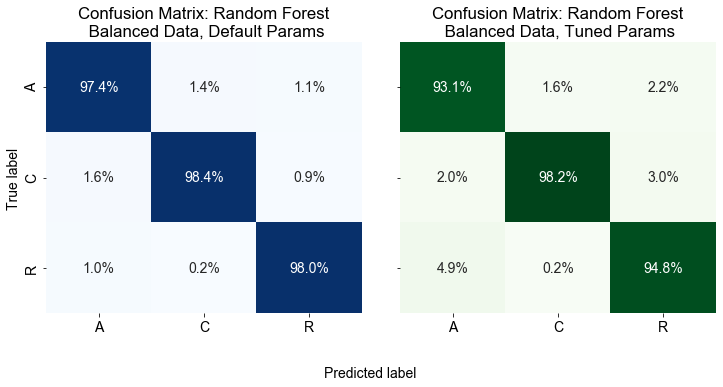

In [29]:
# Plot the solutions using a heatmap/confusion matrix
labels = unique_labels(audit['audited'])
rfc_cm = confusion_matrix(dt_y_test, rfc_y_pred, labels)
rfc2_cm = confusion_matrix(dt_y_test, rfc2_y_pred, labels)

#Transform confusion matrix into dataframe for visualizing
rfc_cm_df = pd.DataFrame(rfc_cm,
                     index = ['A', 'C', 'R'], 
                     columns = ['A','C','R'])

rfc2_cm_df = pd.DataFrame(rfc2_cm,
                     index = ['A', 'C', 'R'], 
                     columns = ['A','C','R'])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
fig.subplots_adjust(wspace=.12)
#first plot
sns.heatmap(rfc_cm_df/np.sum(rfc_cm_df), ax=ax1, annot=True, cbar=False, fmt='.1%', cmap='Blues')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax1.set_title('Confusion Matrix: Random Forest\n Balanced Data, Default Params')
ax1.set_ylabel('True label')
#ax1.set_xlabel('Predicted label')

#second plot
sns.heatmap(rfc2_cm_df/np.sum(rfc2_cm_df), ax=ax2, annot=True, cbar=False, fmt='.1%', cmap='Greens')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
ax2.set_title('Confusion Matrix: Random Forest\n Balanced Data, Tuned Params')
#ax2.set_ylabel('True label')
#ax2.set_xlabel('Predicted label')

fig.text(.5, -0.04, 'Predicted label', ha='center', va='center')
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "18"
plt.savefig('Dual CM.png')
plt.show()

In [30]:
#Set up parameters for graphing function
from sklearn.model_selection import GridSearchCV

n_estimators = [5,10,15,20]                                                    #range of estimators
max_features = ['auto', 'sqrt', 'log2']                                        #features options of rfc
param_grid = dict(n_estimators = n_estimators, max_features = max_features)    #define dictionary
grid = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=5)       #define the model
grid.fit(DT_X_Train,dt_y_train)                                                #fit the parameters into a model
print('RFC Grid Search Best parameters:', grid.best_params_)

RFC Grid Search Best parameters: {'max_features': 'sqrt', 'n_estimators': 20}


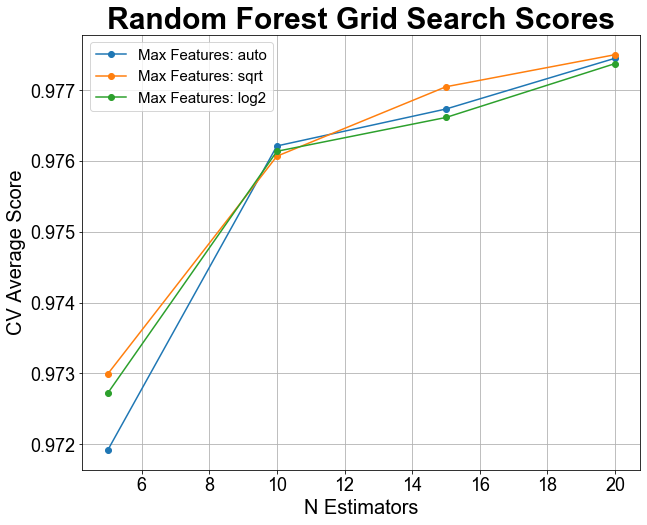

In [31]:
#Define function for plotting the varying estimators and features
def rfc_plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(figsize=(10, 8))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Random Forest Grid Search Scores", fontsize=30, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=20)
    ax.set_ylabel('CV Average Score', fontsize=20)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Call the function 
rfc_plot_grid_search(grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

plt.savefig('Random Forest Grid Search Scores.png')

### KNN Classifier with Balanced Data

In [32]:
#Set the timer
knn_start = time.time()

#Train, test split the sampled data for the model
KNN_X_Train, KNN_X_Test, knn_y_train, knn_y_test = train_test_split(X1_resampled, 
                                                                y1_resampled, 
                                                                test_size=.3) 

#Fit the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(KNN_X_Train, knn_y_train)

#Use the model to predict
knn_y_pred = knn.predict(KNN_X_Test)

print('KNN Accuracy Score:', round(accuracy_score(knn_y_test, knn_y_pred),4))
print('KNN Classification Report:\n', classification_report(knn_y_test, knn_y_pred))

KNN Accuracy Score: 0.9309
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.85      0.90     22410
           2       0.94      0.97      0.95     22870
           3       0.90      0.98      0.94     22848

    accuracy                           0.93     68128
   macro avg       0.93      0.93      0.93     68128
weighted avg       0.93      0.93      0.93     68128



In [33]:
#export classification report to HTML
knn_report = classification_report(knn_y_test, knn_y_pred, output_dict=True)
knn_report_df = pd.DataFrame(knn_report).transpose()
knn_summary = knn_report_df.to_excel('/Users/sjadallah/Dropbox/Thinkful_data/Capstone Final/knn_report.xlsx')

In [34]:
#Use cross validation to identify optimal 'k' number

#Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)

#Train model with cv of 5 
cv_scores = cross_val_score(knn_cv, KNN_X_Train, knn_y_train, cv=5)

#print each cv score (accuracy) and average them
print('KNN Cross Validation Scores:\n', cv_scores)
print('KNN Average CV Score:{:4f}'.format(np.mean(cv_scores)))

KNN Cross Validation Scores:
 [0.90513933 0.90441292 0.90365804 0.9032806  0.90509893]
KNN Average CV Score:0.904318


In [35]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
KNN_gs = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNN_gs, param_grid, cv=5)

#fit model to data
knn_gscv.fit(KNN_X_Train, knn_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
#check top performing n_neighbors value
print('Best Performing n of neighbors:', knn_gscv.best_params_)
print('KNN_Gridsearch Best Score: {:2f}'.format(knn_gscv.best_score_))

Best Performing n of neighbors: {'n_neighbors': 1}
KNN_Gridsearch Best Score: 0.922643


In [37]:
#Set up parameters for graphing function
n_neighbors = [1,5,10,15,20]    
weights = ['uniform', 'distance']
knn_param_grid = dict(n_neighbors = n_neighbors, weights = weights)
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(KNN_X_Train, knn_y_train)
#print(grid.grid_scores_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

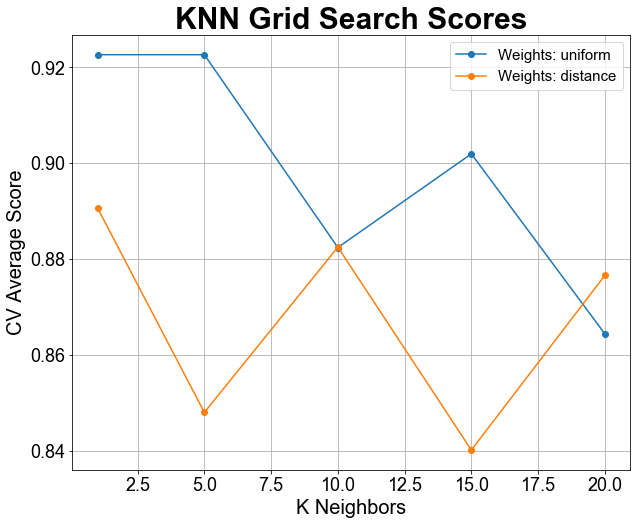

In [38]:
def knn_plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    #fig, ax = plt.subplots(figsize=(10, 8))
    _, ax = plt.subplots(figsize=(10, 8))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("KNN Grid Search Scores", fontsize=30, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=20)
    ax.set_ylabel('CV Average Score', fontsize=20)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')



# Calling Method 
knn_plot_grid_search(knn_grid.cv_results_, n_neighbors, weights, 'K Neighbors', 'Weights')

plt.savefig('KNN Grid Search Scores.png')

In [39]:
# from sklearn import neighbors
# from matplotlib.colors import ListedColormap

In [40]:
# #Train, test split the sampled data for the model
# KNNplt_X_Train, KNNplt_X_Test, knnplt_y_train, knnplt_y_test = train_test_split(X1_resampled, 
#                                                                 y1_resampled, 
#                                                                 test_size=.998) 


# X_plot = KNNplt_X_Train
# y_plot = knnplt_y_train

# print('x1', X_plot.shape)
# print('y1', y_plot.shape)

# # Reduce the X dataset into two components.
# X_pca = PCA(2).fit_transform(X_plot)
# print('X_pca:', X_pca.shape)

In [41]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets


# # # import some data to play with
# # iris = datasets.load_iris()
# # X = iris.data[:, :2]  # we only take the first two features. We could
# #                       # avoid this ugly slicing by using a two-dim dataset
# # y = iris.target

# h = .02  # step size in the mesh

# # Create color maps
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# #for n_neighbors in [1, 5]:
# # we create an instance of Neighbours Classifier and fit the data.
# clf = neighbors.KNeighborsClassifier(n_neighbors = 1, weights= 'uniform')
# clf.fit(X_pca, y_plot)

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
# y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# # Plot also the training points
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_plot, cmap=cmap_bold)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title("KNN Classification (k = %i, weights = '%s')"
#           % (n_neighbors, weights))

# plt.savefig('KNN Classification Mesh Grid.png')
# plt.show()